<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>

### Pregunta 2. Transfer Learning.

Integrantes:

- Christian Da Rocha, ROL: 2018.90.251-9
- Rodrigo Hermosilla, ROL: 95.74.144-4


##### Carga inicial de librerias
> En la siguiente sección y de manera previa se cargan todas las librerías necesarias para el ejercicio. Para efectos de mantener cierto orden con el código de las preguntas del ejercicio, se determino que todas las cargas se realizaran previamente, no obstante, se entiende que esto podría generar alguna ineficiencia en el consumo de recursos, pero que suponemos es marginal.

In [1]:
from keras.datasets import cifar100
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation,Input,BatchNormalization
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


> Descarga y asignación de variables estructuras globales

##### Pregunta A.

<div class="alert alert-block alert-success">
    <b>Nota: </b>Para efectos de mejorar la modularización, el ejercicio construye una serie de funciones, permitiendo además su reutilización en distintos instantes.
</div>

In [2]:
def getData():
    global x_train, y_train, x_test, y_test, x_train_norm, x_test_norm
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
    y_train = keras.utils.to_categorical(y_train, num_classes=100)
    y_test = keras.utils.to_categorical(y_test, num_classes=100)
    x_train_norm = x_train/255.0
    x_test_norm = x_test/255.0

In [3]:
def plotChart(title, v1, l1, v2, l2,v3, l3,v4, l4):
    fig=plt.figure(figsize=(15,5))
    plt.title(title)
    plt.axis('off')
    fig.add_subplot(2,1,1) 
    plt.plot(v1,label=l1, color='y')
    plt.plot(v2,label=l2, color='g')
    plt.legend(loc='upper left')
    plt.ylabel('Error')
    fig.add_subplot(2,1,2) 
    plt.plot(v3,label=l3, color='b')
    plt.plot(v4,label=l4, color='r')
    plt.legend(loc='upper left')
    plt.ylabel('Accuracy')
    plt.xlabel('# epochs')
    plt.show()

In [4]:
def modelA():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [12]:
getData()
model_a=modelA()
model_a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [13]:
def trainingA(model):
    optimizer_ = SGD(lr=0.01,momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
    history=model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test)) 
    return history

In [9]:
history_a = trainingA(model_a)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
  896/50000 [..............................] - ETA: 12:04 - loss: 4.6049 - acc: 0.0089    

KeyboardInterrupt: 

In [ ]:
plotChart('Figura a.1. Loss y Accuracy de entrenamiento y validación en una CNN pre transfer-learning.', 
          history_a.history['loss'], 'Entrenamiento',history_a.history['val_loss'], 'Validación',
          history_a.history['acc'], 'Entrenamiento',history_a.history['val_acc'], 'Validación'
         )

##### Pregunta B.

In [6]:
def modelB1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [10]:
getData()
model_b1=modelB1()
history_b1 = trainingA(model_b1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 263us/step - loss: 4.5128 - acc: 0.0204 - val_loss: 4.5841 - val_acc: 0.0118
Epoch 2/15
50000/50000 [==============================] - 12s 250us/step - loss: 4.2402 - acc: 0.0508 - val_loss: 4.4557 - val_acc: 0.0243
Epoch 3/15
50000/50000 [==============================] - 12s 247us/step - loss: 3.8971 - acc: 0.1008 - val_loss: 4.2846 - val_acc: 0.0521
Epoch 4/15
50000/50000 [==============================] - 12s 248us/step - loss: 3.6712 - acc: 0.1365 - val_loss: 4.1595 - val_acc: 0.0692
Epoch 5/15
50000/50000 [==============================] - 12s 250us/step - loss: 3.5100 - acc: 0.1641 - val_loss: 4.0761 - val_acc: 0.0937
Epoch 6/15
50000/50000 [==============================] - 12s 248us/step - loss: 3.3687 - acc: 0.1910 - val_loss: 4.0604 - val_acc: 0.0923
Epoch 7/15
50000/50000 [==============================] - 12s 249us/step - loss: 3.2526 - acc: 0.2130 - val_loss: 3.

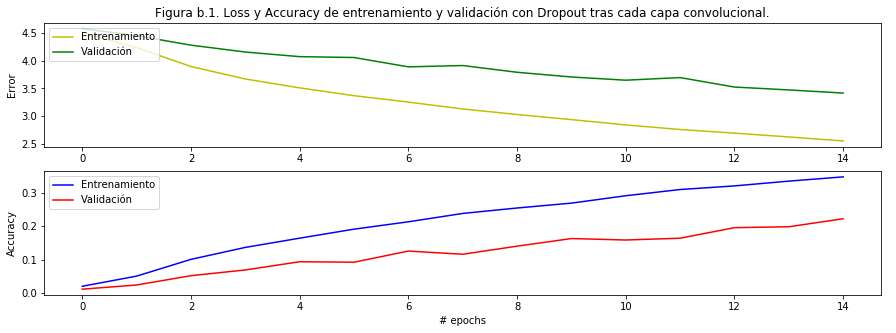

In [11]:
plotChart('Figura b.1. Loss y Accuracy de entrenamiento y validación con Dropout tras cada capa convolucional.', 
          history_b1.history['loss'], 'Entrenamiento',history_b1.history['val_loss'], 'Validación',
          history_b1.history['acc'], 'Entrenamiento',history_b1.history['val_acc'], 'Validación'
         )

In [7]:
def modelB2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [13]:
getData()
model_b2=modelB2()
history_b2 = trainingA(model_b2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 200us/step - loss: 4.5543 - acc: 0.0174 - val_loss: 4.4160 - val_acc: 0.0402
Epoch 2/15
50000/50000 [==============================] - 9s 189us/step - loss: 4.1263 - acc: 0.0660 - val_loss: 3.8841 - val_acc: 0.1138
Epoch 3/15
50000/50000 [==============================] - 9s 190us/step - loss: 3.8486 - acc: 0.1076 - val_loss: 3.6869 - val_acc: 0.1475
Epoch 4/15
50000/50000 [==============================] - 10s 193us/step - loss: 3.6421 - acc: 0.1418 - val_loss: 3.4008 - val_acc: 0.2010
Epoch 5/15
50000/50000 [==============================] - 9s 189us/step - loss: 3.4558 - acc: 0.1742 - val_loss: 3.2706 - val_acc: 0.2272
Epoch 6/15
50000/50000 [==============================] - 10s 192us/step - loss: 3.2876 - acc: 0.2036 - val_loss: 3.1048 - val_acc: 0.2466
Epoch 7/15
50000/50000 [==============================] - 10s 195us/step - loss: 3.1391 - acc: 0.2325 - val_loss: 2.954

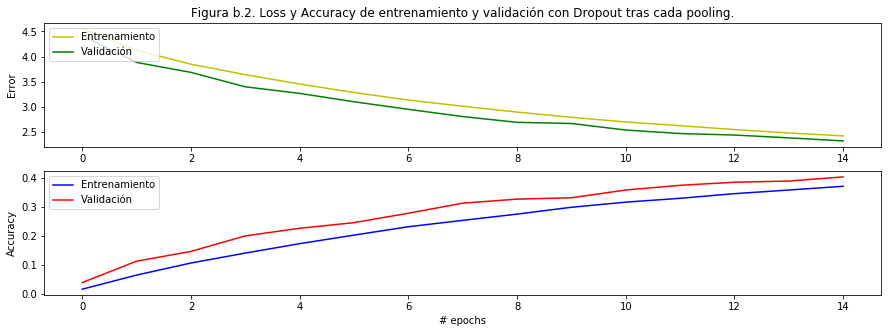

In [14]:
plotChart('Figura b.2. Loss y Accuracy de entrenamiento y validación con Dropout tras cada pooling.', 
          history_b2.history['loss'], 'Entrenamiento',history_b2.history['val_loss'], 'Validación',
          history_b2.history['acc'], 'Entrenamiento',history_b2.history['val_acc'], 'Validación'
         )

In [8]:
def modelB3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [16]:
getData()
model_b3=modelB3()
history_b3 = trainingA(model_b3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 229us/step - loss: 4.2628 - acc: 0.0532 - val_loss: 4.2003 - val_acc: 0.1118
Epoch 2/15
50000/50000 [==============================] - 11s 220us/step - loss: 3.7374 - acc: 0.1286 - val_loss: 3.9432 - val_acc: 0.1620
Epoch 3/15
50000/50000 [==============================] - 11s 221us/step - loss: 3.4266 - acc: 0.1851 - val_loss: 3.7237 - val_acc: 0.1927
Epoch 4/15
50000/50000 [==============================] - 11s 217us/step - loss: 3.1783 - acc: 0.2281 - val_loss: 3.5368 - val_acc: 0.2388
Epoch 5/15
50000/50000 [==============================] - 11s 215us/step - loss: 2.9595 - acc: 0.2700 - val_loss: 3.3204 - val_acc: 0.2682
Epoch 6/15
50000/50000 [==============================] - 11s 216us/step - loss: 2.7690 - acc: 0.3075 - val_loss: 3.3497 - val_acc: 0.2513
Epoch 7/15
50000/50000 [==============================] - 11s 217us/step - loss: 2.6178 - acc: 0.3378 - val_loss: 3.

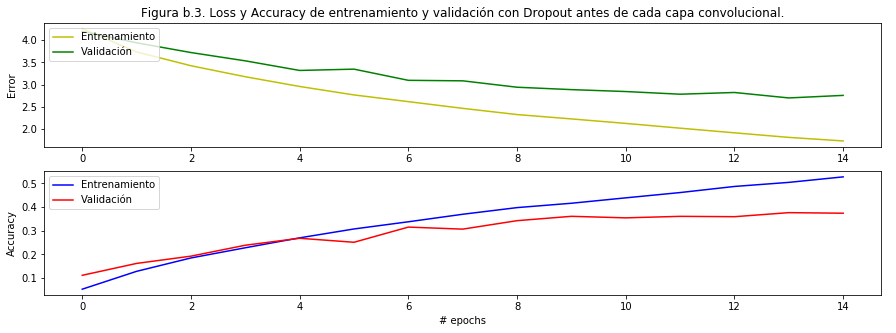

In [17]:
plotChart('Figura b.3. Loss y Accuracy de entrenamiento y validación con Dropout antes de cada capa convolucional.', 
          history_b3.history['loss'], 'Entrenamiento',history_b3.history['val_loss'], 'Validación',
          history_b3.history['acc'], 'Entrenamiento',history_b3.history['val_acc'], 'Validación'
         )

> Tal como se aprecia en las figuras **b.1** a **b.6**, el mejor comportamiento se obtiene aplicando *dropout* despues del pooling.

##### Pregunta C.

In [33]:
def modelVGG(x_train, x_test):
    global x_train_vgg, x_test_vgg, features_train, features_test
    x_train_vgg = preprocess_input(x_train)
    x_test_vgg = preprocess_input(x_test)
    input_tensor=Input(shape=x_train_vgg.shape[1:])
    modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
    features_train = modelVGG.predict(x_train_vgg)
    features_test = modelVGG.predict(x_test_vgg)
    
    return modelVGG

In [35]:
model_vgg=modelVGG(x_train, x_test)
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

##### Pregunta D.

In [36]:
def modelVGGChangedD(model_vgg):
    for i in range(4):
        model_vgg.layers.pop() 
    model = Sequential()
    model.add(Flatten(input_shape=features_train.shape[1:]))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [37]:
model_vgg_d=modelVGGChangedD(model_vgg)

In [38]:
model_vgg_d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               102500    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
Total params: 627,812
Trainable params: 627,812
Non-trainable params: 0
_________________________________________________________________


In [39]:
def trainingD(model):
    global xtr, xt
    optimizer_ = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(features_train, y_train,epochs=10, batch_size=128,verbose=1,validation_data=(features_test,y_test))
    return history

In [ ]:
history_d = trainingD(model_vgg_d)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 63us/step - loss: 14.5954 - acc: 0.0869 - val_loss: 14.4942 - val_acc: 0.0983
Epoch 2/10
50000/50000 [==============================] - 2s 34us/step - loss: 14.5371 - acc: 0.0961 - val_loss: 14.4382 - val_acc: 0.1020
Epoch 3/10
50000/50000 [==============================] - 1s 29us/step - loss: 14.4733 - acc: 0.1008 - val_loss: 14.4973 - val_acc: 0.0994
Epoch 4/10
50000/50000 [==============================] - 1s 30us/step - loss: 14.4412 - acc: 0.1029 - val_loss: 14.3627 - val_acc: 0.1077
Epoch 5/10
50000/50000 [==============================] - 2s 31us/step - loss: 14.4725 - acc: 0.1012 - val_loss: 14.4450 - val_acc: 0.1035
Epoch 6/10
50000/50000 [==============================] - 2s 33us/step - loss: 14.4567 - acc: 0.1025 - val_loss: 14.3918 - val_acc: 0.1063
Epoch 7/10
50000/50000 [==============================] - 2s 36us/step - loss: 14.6012 - acc: 0.0937 - val_loss: 14.

In [ ]:
plotChart('Figura d.1. Loss y Accuracy de entrenamiento y validación de red pre-entrenada.', 
          history_d.history['loss'], 'Entrenamiento',history_d.history['val_loss'], 'Validación',
          history_d.history['acc'], 'Entrenamiento',history_d.history['val_acc'], 'Validación'
         )

##### Pregunta E.

In [ ]:
def modelVGGChangedE(model_vgg):
    for i in range(4):
        model_vgg.layers.pop() 
    model = Sequential()
    model.add(Flatten(input_shape=features_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [ ]:
model_vgg_e=modelVGG(x_train, x_test)

In [ ]:
model_vgg_chng_e=modelVGGChangedE(model_vgg_e)

In [ ]:
history_e = trainingD(model_vgg_chng_e)

In [ ]:
plotChart('Figura e.1. Loss y Accuracy de entrenamiento y validación de red pre-entrenada.', 
          history_e.history['loss'], 'Entrenamiento',history_e.history['val_loss'], 'Validación',
          history_e.history['acc'], 'Entrenamiento',history_e.history['val_acc'], 'Validación'
         )

##### Pregunta F.

In [ ]:
x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)

In [ ]:
input_tensor=Input(shape=x_train_vgg.shape[1:])
model_vgg_f = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
#modelVGG = VGG16(weights='imagenet', include_top=True,input_tensor=input_tensor ) #LOAD PRETRAINED MODEL 

In [ ]:
#model_vgg_f.layers.pop() #delete last softmax layer
model_vgg_f.summary()
features_train = model_vgg_f.predict(x_train_vgg)
features_test = model_vgg_f.predict(x_test_vgg)


In [ ]:
def modelVGGChangedF(model_vgg):
    model = Sequential()
    model.add(Flatten(input_shape=features_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [ ]:
model_f = modelVGGChangedF(model_vgg_f);

In [ ]:
history_f = trainingD(model_f)

In [ ]:
plotChart('Figura f.1. Loss y Accuracy de entrenamiento y validación de red pre-entrenada.', 
          history_f.history['loss'], 'Entrenamiento',history_f.history['val_loss'], 'Validación',
          history_f.history['acc'], 'Entrenamiento',history_f.history['val_acc'], 'Validación'
         )

##### Pregunta G.

Responder